In [1]:
try:
    from pycaret import show_versions
except ModuleNotFoundError:
    !pip install pycaret-ts-alpha
    from pycaret import show_versions

show_versions()

     |████████████████████████████████| 468 kB 5.3 MB/s 
     |████████████████████████████████| 11.2 MB 54.0 MB/s 
     |████████████████████████████████| 79.9 MB 129 kB/s 
     |████████████████████████████████| 3.3 MB 40.8 MB/s 
     |████████████████████████████████| 303 kB 66.7 MB/s 
     |████████████████████████████████| 120 kB 19.3 MB/s 
     |████████████████████████████████| 6.5 MB 31.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 47.4 MB/s 
     |████████████████████████████████| 9.8 MB 49.1 MB/s 
     |████████████████████████████████| 2.0 MB 46.4 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 930 kB 57.5 MB/s 
     |████████████████████████████████| 34.5 MB 8.2 kB/s 
  Created wheel for pyod: filename=pyod-1.0.1-py3-none-any.whl size=147473 sha256=76bca405d0d2245579c09a3710243d829571fce1212a8474edc9


System:
    python: 3.7.13 (default, Apr 24 2022, 01:04:09)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 21.1.3
   setuptools: 57.4.0
      pycaret: 3.0.0
      sklearn: 1.0.2
       sktime: 0.10.1
  statsmodels: 0.13.2
        numpy: 1.21.6
        scipy: 1.7.3
       pandas: 1.3.5
   matplotlib: 3.2.2
       plotly: 5.5.0
       joblib: 1.0.1
        numba: 0.55.1
       mlflow: Not installed
     lightgbm: 3.3.2
      xgboost: 0.90
     pmdarima: 1.8.5
        tbats: Installed but version unavailable
      prophet: Not installed
      tsfresh: Not installed


In [2]:
import numpy as np
import pandas as pd
from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [20]:
data = pd.read_excel("/content/ER PYCARET.xlsx")
data

,DATE,COUNT
0,2021-06-01,1276
1,2021-07-01,1215
2,2021-08-01,1286
3,2021-09-01,1603
4,2021-10-01,2040
5,2021-11-01,1886
6,2021-12-01,1894
7,2022-01-01,2541
8,2022-02-01,1541
9,2022-03-01,1351


In [16]:
#### Intermittent Demand ----
from scipy.stats import poisson
np.random.seed(42)
data = pd.DataFrame({"demand": poisson.rvs(mu=0.25, size=144)})

In [ ]:
eda = TSForecastingExperiment()

In [31]:
#### Create Time Series Forecasting Experiment ----
eda = TSForecastingExperiment()
global_plot_settings = {"renderer": "colab"}
exp.setup(data=data,target='COUNT', seasonal_period=1, fh=1, fig_kwargs=global_plot_settings, session_id=42)

,Description,Value
0,session_id,42
1,Target,COUNT
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(11, 2)"
5,Train data shape,"(10, 2)"
6,Test data shape,"(1, 2)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [32]:
exp.models()

,Name,Reference,Turbo
ID,,,
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,pycaret.containers.models.time_series.BaseCdsD...,True
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,pycaret.containers.models.time_series.BaseCdsD...,True
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,pycaret.containers.models.time_series.BaseCdsD...,True


In [37]:
fh=2
# Global Plot Settings
fig_kwargs={'renderer': 'colab'}

In [38]:
eda.setup(data=data, fh=fh,seasonal_period=12, fig_kwargs=fig_kwargs,session_id=42,target='COUNT')

,Description,Value
0,session_id,42
1,Target,COUNT
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(11, 2)"
5,Train data shape,"(9, 2)"
6,Test data shape,"(2, 2)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


""


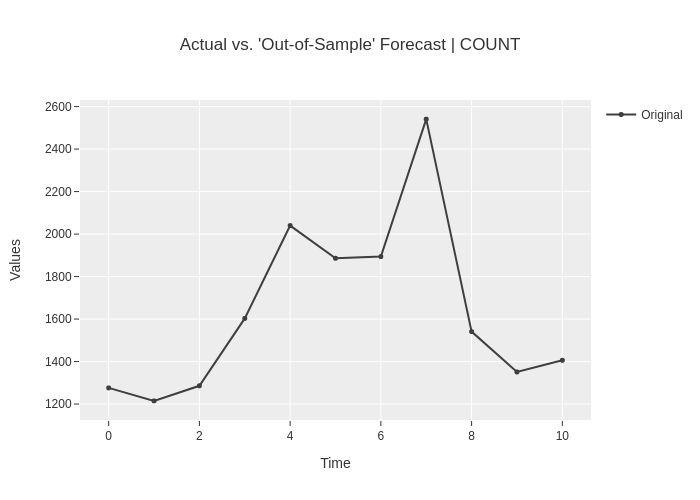

In [39]:
best_baseline = eda.compare_models()
eda.plot_model(best_baseline,fig_kwargs={'renderer': 'png'})

In [40]:
print(eda.predict_model(best_baseline))

AttributeError: ignored